## Exercise 3: Clustering and  Centrality Measures

In this exercise sheet, we are once again going to work with the Jazz musician network the we have already used. Throughout this exercise, we will denote this graph with $G$, and its adjacency matrix with $A$.

In [2]:
import networkx as nx

In [5]:
G = nx.read_edgelist('../data/jazz.txt', nodetype=int)

### Task 1: Clustering

__a)__ Determine the average local clustering coefficient of all nodes in the graph!

In [6]:
nx.average_clustering(G)

0.6174507021536305

__b)__ Print all nodes in the network which have a local clustering of 1!

In [7]:
# Local clustering coefficient of all nodes.
C = nx.clustering(G)
print(C)

{0: 0.6561264822134387, 7: 0.7428571428571429, 23: 0.4802955665024631, 34: 0.6356589147286822, 41: 0.5151515151515151, 45: 0.6482213438735178, 59: 0.31162280701754386, 73: 0.5157894736842106, 77: 0.46153846153846156, 80: 0.4831591173054588, 94: 0.5128205128205128, 97: 0.6405797101449275, 98: 0.46497175141242936, 99: 0.5952380952380952, 100: 0.592687074829932, 102: 0.4624505928853755, 103: 0.5157894736842106, 107: 0.4858757062146893, 130: 0.512987012987013, 131: 0.40396396396396395, 153: 0.6356589147286822, 158: 0.4666666666666667, 167: 0.36208811551277303, 170: 0.4626262626262626, 1: 1.0, 13: 0.7066666666666667, 53: 0.4473429951690821, 149: 0.5222672064777328, 2: 1.0, 114: 0.38095238095238093, 152: 0.2865853658536585, 166: 0.44242424242424244, 171: 0.5294871794871795, 3: 0.825, 4: 0.421256038647343, 12: 0.6733333333333333, 25: 0.6903225806451613, 76: 0.6798029556650246, 84: 0.8771929824561403, 101: 0.8947368421052632, 137: 0.6679841897233202, 146: 0.573549257759784, 155: 0.805194805194

In [8]:
print([k for k, v in C.items() if v == 1.0])

[1, 2, 5, 112, 185, 21, 40, 44, 81, 144]


__c)__ Create a plot of the graph in which all nodes are colored proportional to their local clustering coefficient!

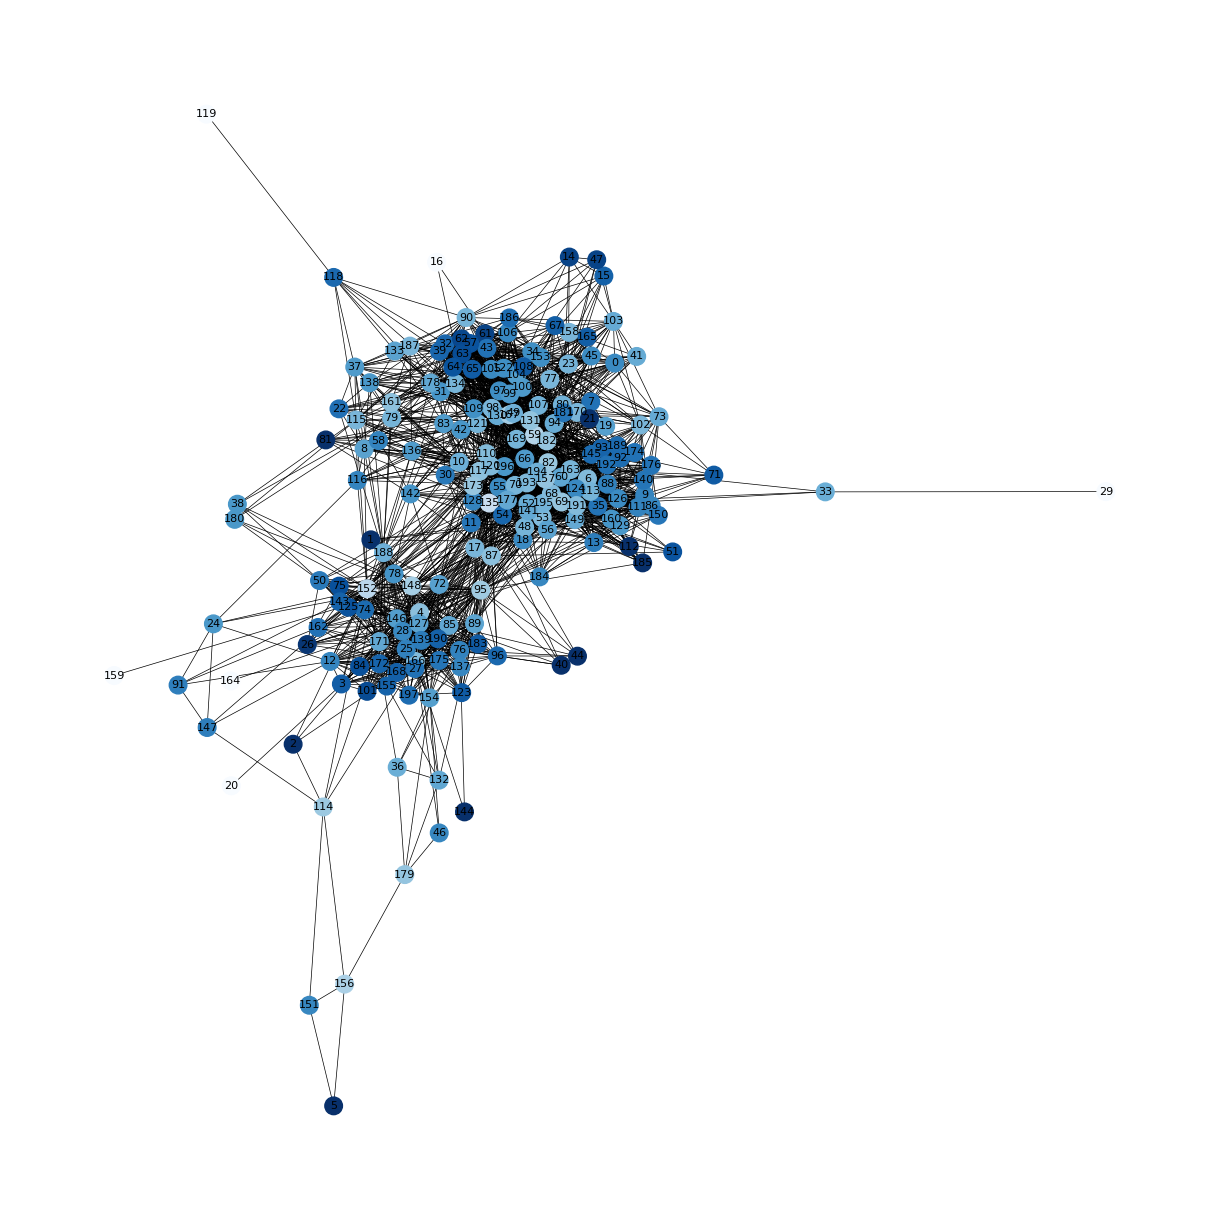

In [9]:
import matplotlib.pyplot as plt

options = {
    'node_size': 160,
    'width': 0.5,
    'with_labels' : True,
    'font_size': 8,
    'node_color': list(C.values()),    # centrality values are mapped to color values
    'cmap': plt.cm.Blues
}

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed = 4711)

nx.draw(G, pos, **options)

### Task 2: Katz Centrality

__a)__ Use networkX to compute the Katz centrality of all nodes in the graph (using default parameters $\alpha=0.1$ and $\beta = 1$). Note that networkX offers two functions for this, and that by default the centrality vectors are normalized so that its $L_2$-Norm equals 1.
Why does one method fail?

In [ ]:
CK = nx.katz_centrality(G)

In [11]:
# Use direct solver built on numpy instead, note that this does not scale well to larger graphs either.
CK = nx.katz_centrality_numpy(G)
print(CK)

c:\Users\stefa\anaconda3\lib\site-packages\networkx\algorithms\centrality\katz.py:325: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=nodelist, weight=weight).todense().T


{0: -0.11409337718848721, 7: -0.010910431244823474, 23: -0.06985614541725169, 34: -0.07500386535044305, 41: -0.10084409203159948, 45: -0.1407749053997211, 59: -0.07038119673813788, 73: -0.031740409332668265, 77: -0.0022622923049450258, 80: -0.07007183364379564, 94: -0.030425884913836354, 97: 0.013633341159878127, 98: 0.02727357669798803, 99: 0.015447676191925665, 100: -0.005781451030921113, 102: -0.009863437466497241, 103: -0.10585461045453237, 107: -0.03830368455439864, 130: -0.021454114776023665, 131: -0.0642660818609596, 153: -0.07500386535044312, 158: -0.024532193925144854, 167: 0.04409452180772961, 170: -0.09587107290946713, 1: -0.019474840209542717, 13: -0.010539623092303331, 53: -0.04365690359899518, 149: 0.05762944363265523, 2: -0.0003963737839077356, 114: -0.005865327949368331, 152: 0.1765951653453309, 166: -0.008283024586654558, 171: 0.03177076838839851, 3: -0.03676960527083298, 4: 0.026623309945199687, 12: -0.03876008888961371, 25: -0.046549490056213505, 76: -0.0668609164355

**Answer:** The non-numpy method does not converge, as the default parameter value $\alpha = 0.1$ might be too large, i.e. bigger than $\lambda_{max}^{-1}$. For that reason, the numpy version also yields negative centralities.

__b)__ Apply the `linalg` module from scipy to compute the largest eigenvalue $\lambda_{max}$ of the adjacency matrix of $G$, and its inverse value, which yields an upper bound on the alpha that can be used to determine Katz centrality.

In [12]:
from scipy import linalg as la

In [13]:
# compute eigenvalues of adjacency matrix of G
lambda_max = max(la.eigvals(nx.to_numpy_matrix(G)))  
alpha_max = 1/lambda_max

print(lambda_max)
print(alpha_max)

(40.027375912757975+0j)
(0.024982901756526805+0j)


__c)__ For some $\alpha < \lambda_{max}^{-1}$, compute the 10 most central nodes in the network, and plot the network using a spring layout with the most central nodes having a distinct color. Feel free to try out other values of $\alpha$.

In [14]:
alpha = 0.01
CK = nx.katz_centrality_numpy(G, alpha=alpha)
central_nodes = sorted(CK, key=CK.get, reverse=True)[:10]

print(central_nodes)

[135, 59, 131, 167, 107, 69, 98, 82, 130, 157]


c:\Users\stefa\anaconda3\lib\site-packages\networkx\algorithms\centrality\katz.py:325: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=nodelist, weight=weight).todense().T


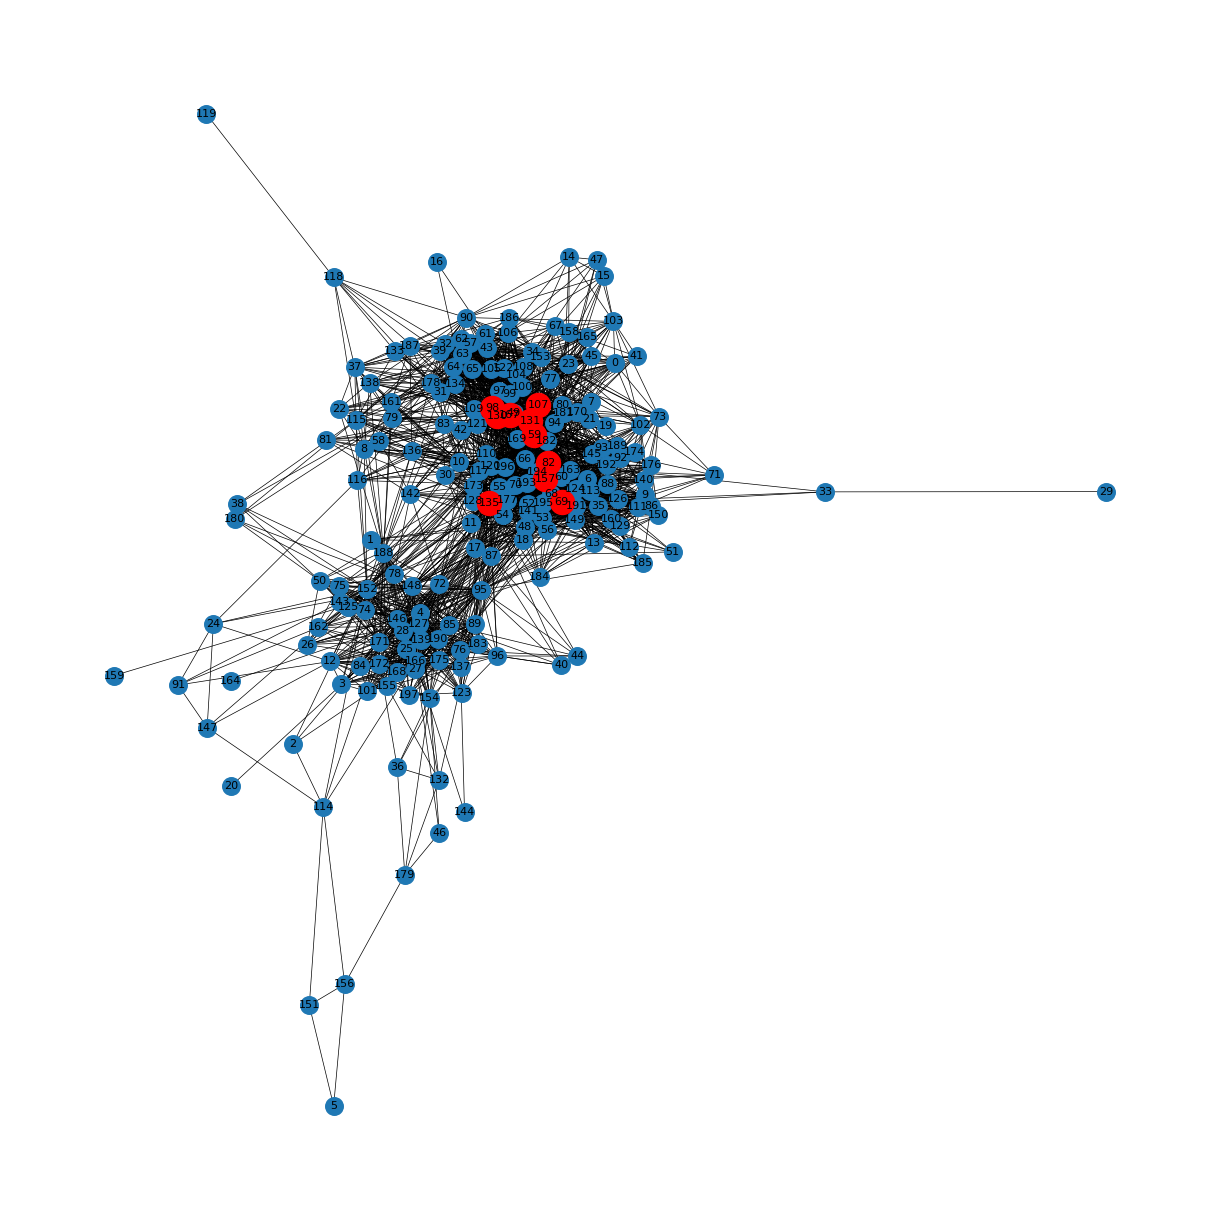

In [15]:
options = {
'node_size': 160,
'width': 0.5,
'with_labels' : True,
'font_size': 8
}

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed = 4711)

nx.draw(G, pos, **options)
nx.draw_networkx_nodes(G, pos, nodelist=central_nodes, node_color='red')

### Task 3: Eigenvector Centrality and PageRank

__a)__ The PageRank centrality is based on Eigenvector centrality. The Eigenvector centrality of a node is a measure of how connected the node is to other influential nodes. It can be calculated by aggregating the Eigenvector centrality of all neighboring nodes. For a graph $G$ with adjacency matrix $A$, $N$ nodes and a constant $\lambda$, the Eigenvector centrality $x_i$ of node $i$ is defined as
$$x_i = \frac{1}{\lambda} \sum_{j = 1}^{N} A_{ij} x_j\ .$$
This equation can be rewritten in vector notation as
$$Ax = \lambda x$$
which corresponds to the eigenvector equation. Hence, $\lambda$ is an eigenvalue of $A$ and the vector of node centralities $x$ is the corresponding eigenvector. While this equation may have many different solutions, there is only one unique solution for which all entries in $x$ are non-negative. This solution is obtained when $\lambda$ is the largest eigenvector of $A$ and $x$ is the corresponding eigenvector.   
Use networkX to compute the Eigenvector centrality of $G$. What are the most central nodes according to this measure? Do they coincide with the most central nodes with respect to Katz centrality? Again, plot the network with the 10 most central nodes in a distinct color. Note that you can fix the orientation of the plotted network by setting a seed in the layout that you pass to the `pos` argument in `nx.draw()`.

In [16]:
CE = nx.eigenvector_centrality(G)
central_nodes = sorted(CE, key=CE.get, reverse=True)[:10]

print(central_nodes)

[59, 131, 135, 167, 107, 98, 130, 69, 82, 193]


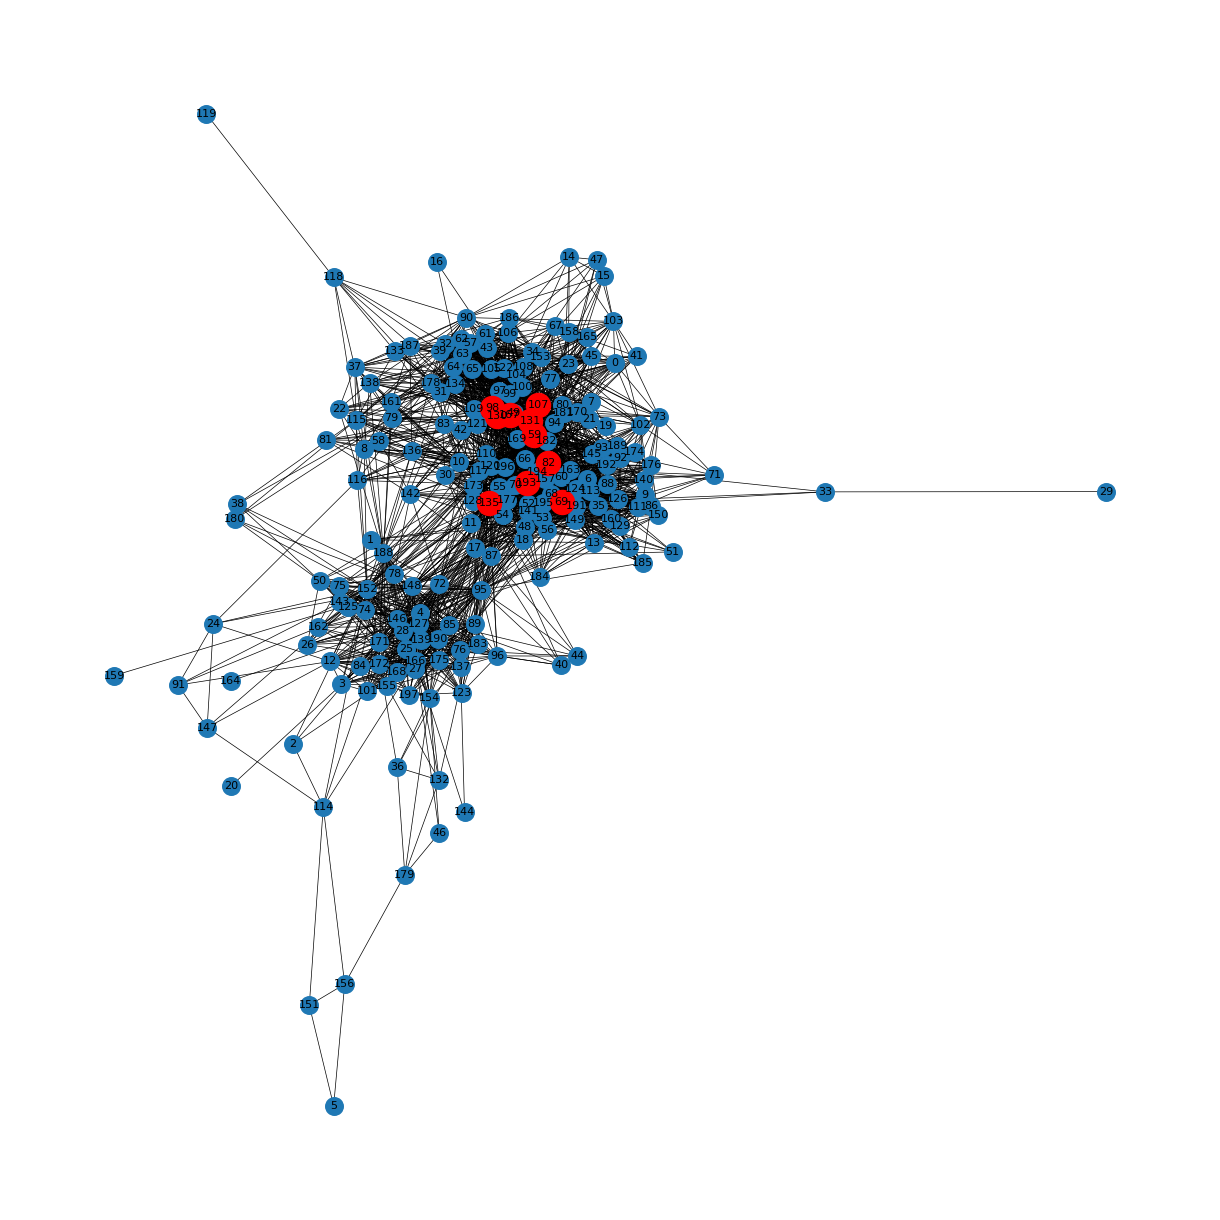

In [17]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed = 4711)

nx.draw(G, pos, **options)
nx.draw_networkx_nodes(G, pos, nodelist=central_nodes, node_color='red')

__b)__ Compute the normalized eigenvector centrality of the directed path graph $H$ that is initialized in the cell below. Note that since the last node does not have an outgoing link, we give it a self-loop. What do you observe?

In [18]:
H = nx.path_graph(10, create_using=nx.DiGraph())
H.add_edge(9,9)
print(H.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 9)]


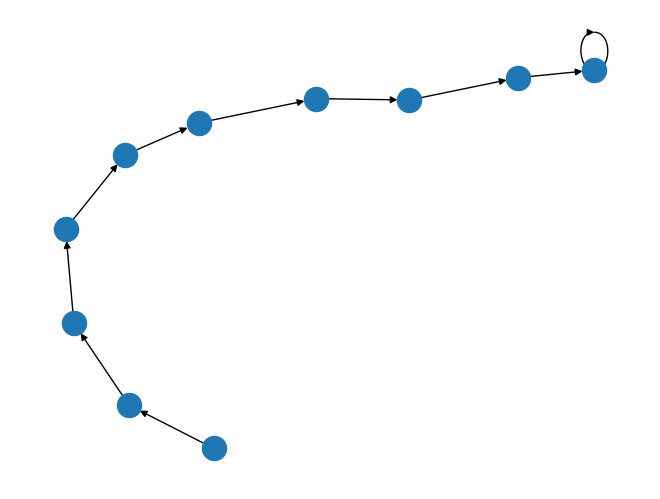

In [19]:
nx.draw(H)

In [20]:
nx.eigenvector_centrality(H)

{0: 9.09505360989772e-14,
 1: 3.728971980058065e-12,
 2: 7.467039013726026e-11,
 3: 9.732616867951548e-10,
 4: 9.285231180880679e-09,
 5: 6.913141153829645e-08,
 6: 4.1823413028988846e-07,
 7: 2.113875907083335e-06,
 8: 9.108398236356304e-06,
 9: 0.9999999999561945}

**Answer:** The full centrality score gets into the sink node, which, from a random walker perspective, is very intuitive, as the random walker eventually will end up in the sink node.

__e)__ To account for such "spider traps" in random walks, the __PageRank__ algorithm introduces the concept of random restarts. Assuming a random walker that is currently at node $i$, the walker can either follow one of node $i$'s outgoing links or randomly teleport to any other node in the network. The probability that the random walker decides to follow an outgoing link in the network instead of randomly teleporting is modeled by a _damping factor_ $s\in (0,1)$, i.e., for $s=0.9$ the random walker will follow an outgoing link with 90\% probability, and randomly teleport with a probability of 10\%.
Using these variables, the PageRank centrality $x^{PR}_i$ of node $i$ is defined as
$$
x^{PR}_i = s\sum_{j=1}^N {P^T}_{ij} \cdot x^{PR}_j + \frac{(1-s)}{N} \ .
$$
Note that while this equation can be directly solved algebraically, the more efficient way to compute the PageRank vector $x^{PR}$ is via the following iteration (using theory on Markov chains, one can prove that this iteration always converges):
$$
 x^{PR} \gets sP^Tx^{PR} + \frac{(1-s)}{N}e
$$
where $e$ is the $N$-dimensional vector in which all elements equal $1$, and where $x^{PR}$ can be initialized randomly as long as its elements sum to 1.

Write a function that computes the PageRank centrality of a given a graph, using the signature in the cell below. Initialize your centrality vector by setting all its elements to $\frac{1}{N}$. You can assume that you have converged to a solution when $||x^{PR}_{new} - x^{PR}_{old}||_2 < \epsilon$ for a given $\epsilon$ or when you have reached the given number of iterations.

__Note:__ The PageRank algorithm is named after Larry Page, the co-founder of Google, who has initially invented this algorithm to rank webpages which fit a web search query.

__f)__ Compute the PageRank of the nodes in $G$ and in the path graph $H$. One final time, determine the nodes with the ten highest centralities in $G$, and plot the graph you have done before.

In [21]:
nx.pagerank(H)

{0: 0.015000000000000003,
 1: 0.027750000000000004,
 2: 0.03858750000000001,
 3: 0.047799375000000005,
 4: 0.05562946875000001,
 5: 0.062285048437500004,
 6: 0.067942291171875,
 7: 0.07275094749609376,
 8: 0.0768383053716797,
 9: 0.5354170637728516}

In [22]:
PG = nx.pagerank(G)
central_nodes = sorted(PG, key=PG.get, reverse=True)[:10]
print(central_nodes)

[135, 59, 167, 131, 148, 69, 166, 82, 95, 4]


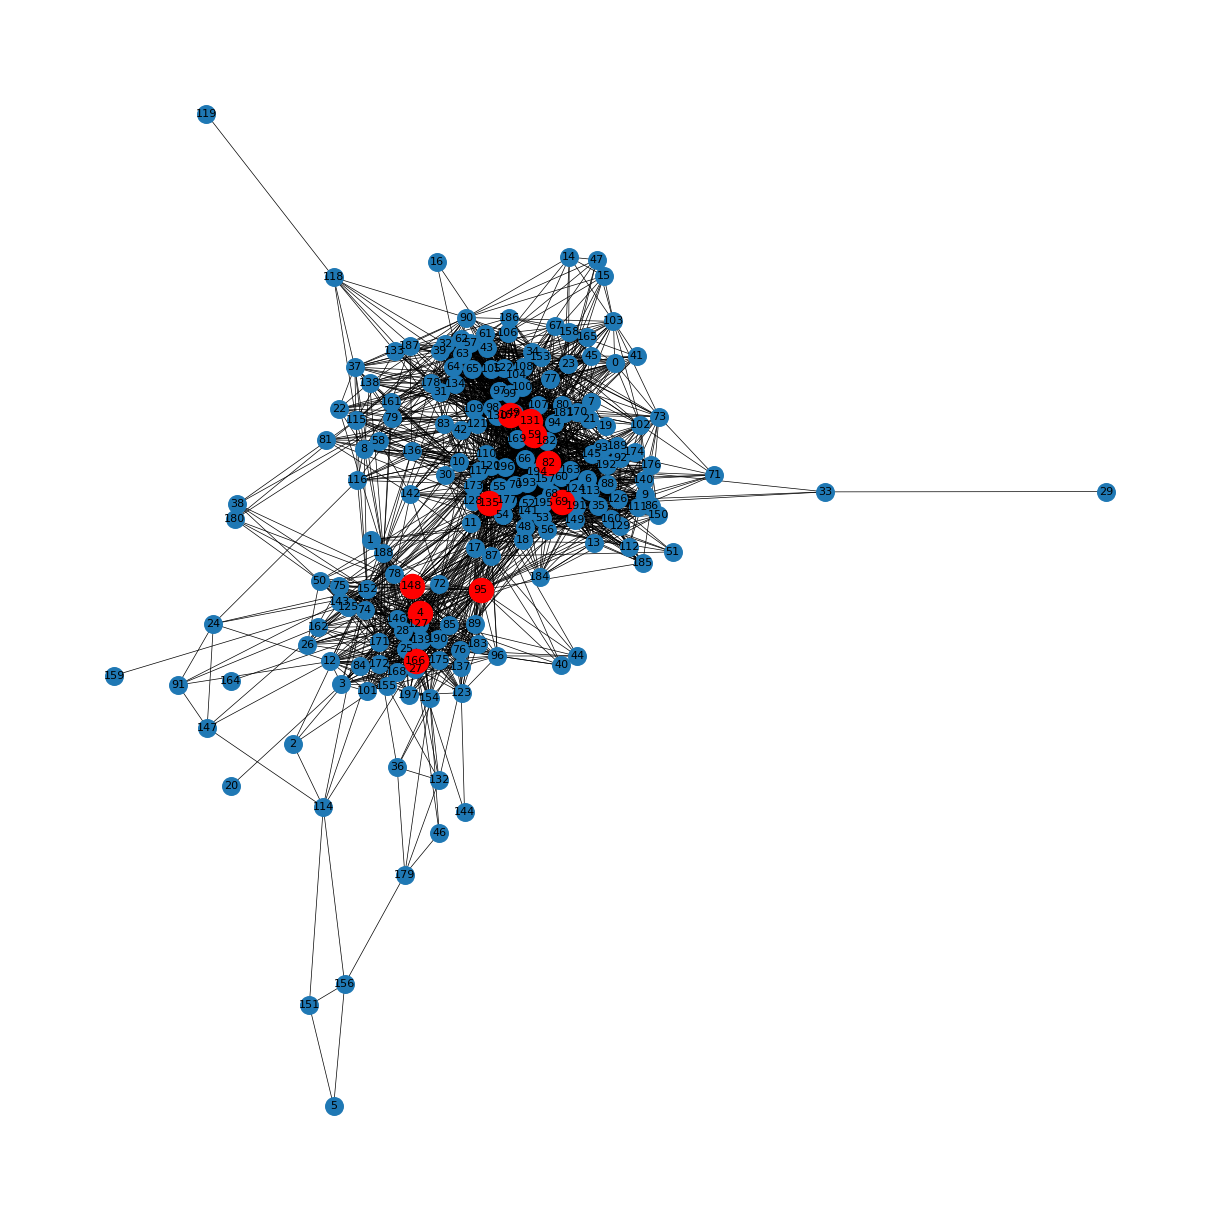

In [23]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed = 4711)

nx.draw(G, pos, **options)
nx.draw_networkx_nodes(G, pos, nodelist=central_nodes, node_color='red')

Note how in the path graph, every node now has a value bigger than 0, which is increasing the closer we get to the sink node.  
Regarding $G$, we can see how the pagerank centrality also considers nodes from the second biggest cluster as central nodes.